In [1]:
from fastai.tabular import * 

In [2]:
dPath = Path("../docs/dumps")

In [3]:
with open(dPath / "train_data.pkl", 'rb') as filename:
    train_data = pickle.load(filename)

In [4]:
with open(dPath / "valid_data.pkl", 'rb') as filename:
    valid_data = pickle.load(filename)

In [5]:
with open(dPath / "test_data.pkl", 'rb') as filename:
    test_data = pickle.load(filename)

In [6]:
with open(dPath / "not_running.pkl", 'rb') as filename:
    not_running = pickle.load(filename)

In [7]:
with open(dPath / "rf_exp_05_names.pkl", 'rb') as filename:
    names = pickle.load(filename)

In [8]:
with open(dPath / "mutclslabels.pkl", 'rb') as filename:
    mutclslabels = pickle.load(filename)

with open(dPath / "retypelabels.pkl", 'rb') as filename:
    retypelabels = pickle.load(filename)

mutclscodes = dict(zip(mutclslabels,range(len(mutclslabels))))

retypecodes = dict(zip(retypelabels,range(len(retypelabels))))

In [9]:
test_data.replace(mutclscodes, inplace=True)
test_data.replace(retypecodes, inplace=True)

In [10]:
test_data['MutatorClass'] = test_data.MutatorClass.astype('category')
test_data['returnType'] = test_data.returnType.astype('category')

In [11]:
len(valid_data)

67496

In [12]:
from imblearn.over_sampling import RandomOverSampler

In [13]:
ros = RandomOverSampler(random_state=42)

In [14]:
X_train = train_data.drop("Detected", axis=1)
y_train = train_data.Detected

In [15]:
%time X_train, y_train = ros.fit_resample(X_train, y_train)

Wall time: 5.3 s


In [16]:
train_data = pd.concat([X_train, y_train], axis=1)

In [17]:
all_df = pd.concat([train_data, not_running, valid_data],axis=0,ignore_index=True)

In [18]:
all_df['MutatorClass'] = all_df.MutatorClass.astype('category')

In [19]:
all_df['returnType'] = all_df.returnType.astype('category')

In [20]:
all_df.head().T.head(40)

,0,1,2,3,4
MutatorClass,2,6,6,0,0
returnType,3,3,3,3,3
numExecuted,14,14,14,14,14
numTestCover,1,1,1,1,1
numAssertInTM,7,7,7,7,7
numAssertInTC,14,14,14,14,14
ppnumberOfClasses,5,5,5,5,5
ppnumberOfStatements,232,232,232,232,232
ppavcc,2.125,2.125,2.125,2.125,2.125
pphalsteadCumulativeBugs,2.63609,2.63609,2.63609,2.63609,2.63609


In [21]:
all_df = all_df[list(names) + ['Detected']]
test_data = test_data[list(names) + ['Detected']]

In [22]:
procs = [Categorify, Normalize]

In [23]:
valid_idx = range(len(all_df) - len(valid_data)//10, len(all_df))

In [24]:
dep_var = 'Detected'
cat_names = ['MutatorClass', 'returnType']

In [25]:
data = TabularDataBunch.from_df(dPath, all_df, dep_var, valid_idx=valid_idx, procs=procs, cat_names=cat_names,test_df=test_data)

In [26]:
learn = tabular_learner(data, layers=[200,100], emb_szs={'MutatorClass': 8, 'returnType': 10}, metrics=[accuracy,Precision(),Recall(),MatthewsCorreff(),AUROC(), FBeta(beta=1)])

In [27]:
learn.summary()

TabularModel
Layer (type)         Output Shape         Param #    Trainable 
Embedding            [8]                  144        True      
______________________________________________________________________
Embedding            [10]                 220        True      
______________________________________________________________________
Dropout              [18]                 0          False     
______________________________________________________________________
BatchNorm1d          [36]                 72         True      
______________________________________________________________________
Linear               [200]                11,000     True      
______________________________________________________________________
ReLU                 [200]                0          False     
______________________________________________________________________
BatchNorm1d          [200]                400        True      
_________________________________________________

In [28]:
learn.lr_find()

epoch,train_loss,valid_loss,accuracy,precision,recall,matthews_correff,auroc,f_beta,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 9.12E-03
Min loss divided by 10: 4.79E-03


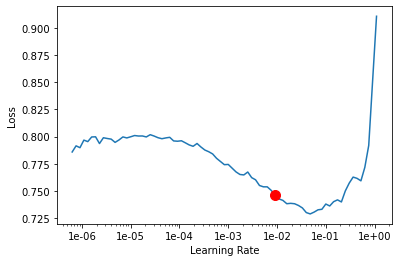

In [29]:
learn.recorder.plot(suggestion=True)

In [ ]:
learn.fit_one_cycle?

In [30]:
learn.fit_one_cycle(2, max_lr = 6.31E-02)

epoch,train_loss,valid_loss,accuracy,precision,recall,matthews_correff,auroc,f_beta,time
0,0.590990,0.539893,0.760261,0.809381,0.910610,0.140390,0.626575,0.857017,08:27
1,0.538770,0.519702,0.765447,0.837970,0.871174,0.256371,0.705341,0.854249,08:38


In [31]:
learn.show_results(5)

MutatorClass,returnType,cchalsteadCumulativeBugs,ppnumberOfMethods,ccfanIn,mmhalsteadVocabulary,pptcc,ppmaintainabilityIndexNC,mminstanceVariablesReferenced,ppdistance,numAssertInTM,ppnumberOfClasses,ppmaxcc,ccmaintainabilityIndexNC,cchalsteadEffort,ppinstability,numAssertInTC,ppavcc,pploc,mmnumberOfExpressions,mmhalsteadDifficulty,ccmaintainabilityIndex,ppnumberOfStatements,ppRVF,numTestCover,ccimportedPackages,ppmaintainabilityIndex,ppabstractness,ccunweightedClassSize,ccnumberOfStatements,ccexternalMethodCalls,ppfanout,ppfanin,mmvariablesReferenced,mmhalsteadEffort,mmexternalMethodsCalled,cchalsteadCumulativeVolume,numExecuted,target,prediction
2,3.0,-0.4273,-0.5192,-0.2551,-0.4843,-0.5200,-0.4263,-0.2189,-0.4057,-0.0541,-0.4961,-0.5490,-0.1170,-0.1720,1.0291,-0.0626,-0.1324,-0.5073,-0.2381,-0.2790,-0.8695,-0.5083,-0.6446,-0.2214,-0.6517,-0.1711,-0.8741,-0.5280,-0.4702,-0.5987,-0.6323,-0.5130,-0.4326,-0.1585,-0.2860,-0.4273,-0.0342,True,True
6,3.0,-0.4273,-0.5192,-0.2551,-0.4843,-0.5200,-0.4263,-0.2189,-0.4057,-0.0541,-0.4961,-0.5490,-0.1170,-0.1720,1.0291,-0.0626,-0.1324,-0.5073,-0.2381,-0.2790,-0.8695,-0.5083,-0.6446,-0.2214,-0.6517,-0.1711,-0.8741,-0.5280,-0.4702,-0.5987,-0.6323,-0.5130,-0.4326,-0.1585,-0.2860,-0.4273,-0.0342,True,True
6,3.0,-0.4273,-0.5192,-0.2551,-0.4843,-0.5200,-0.4263,-0.2189,-0.4057,-0.0541,-0.4961,-0.5490,-0.1170,-0.1720,1.0291,-0.0626,-0.1324,-0.5073,-0.2381,-0.2790,-0.8695,-0.5083,-0.6446,-0.2214,-0.6517,-0.1711,-0.8741,-0.5280,-0.4702,-0.5987,-0.6323,-0.5130,-0.4326,-0.1585,-0.2860,-0.4273,-0.0342,True,True
0,3.0,-0.4273,-0.5192,-0.2551,-0.4843,-0.5200,-0.4263,-0.2189,-0.4057,-0.0541,-0.4961,-0.5490,-0.1170,-0.1720,1.0291,-0.0626,-0.1324,-0.5073,-0.2381,-0.2790,-0.8695,-0.5083,-0.6446,-0.2214,-0.6517,-0.1711,-0.8741,-0.5280,-0.4702,-0.5987,-0.6323,-0.5130,-0.4326,-0.1585,-0.2860,-0.4273,-0.0342,True,True
0,3.0,-0.4273,-0.5192,-0.2551,-0.4843,-0.5200,-0.4263,-0.2189,-0.4057,-0.0541,-0.4961,-0.5490,-0.1170,-0.1720,1.0291,-0.0626,-0.1324,-0.5073,-0.2381,-0.2790,-0.8695,-0.5083,-0.6446,-0.2214,-0.6517,-0.1711,-0.8741,-0.5280,-0.4702,-0.5987,-0.6323,-0.5130,-0.4326,-0.1585,-0.2860,-0.4273,-0.0342,True,True


In [32]:
interp = ClassificationInterpretation.from_learner(learn)

In [33]:
interp.confusion_matrix()

array([[ 527,  897],
       [ 686, 4639]], dtype=int64)

In [34]:
interp.most_confused()

[(False, True, 897), (True, False, 686)]

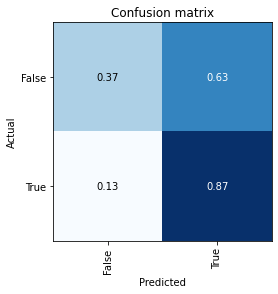

In [35]:
interp.plot_confusion_matrix(normalize=True)

In [36]:
learn.save('fastai_exp_6')
learn = learn.load('fastai_exp_6')

In [47]:
learn.unfreeze()

In [ ]:
learn.lr_find()

In [ ]:
learn.recorder.plot(suggestion=True)

In [48]:
learn.fit_one_cycle(1, max_lr = 6.31E-02)

epoch,train_loss,valid_loss,accuracy,precision,recall,matthews_correff,auroc,f_beta,time
0,0.542132,0.540062,0.765150,0.832740,0.878873,0.239149,0.687699,0.855185,08:35


In [49]:
preds,_ = learn.get_preds(ds_type=DatasetType.Test)
result = preds.numpy()[:, 0]

In [50]:
len(preds), preds

(58476,
 tensor([[0.5188, 0.4812],
         [0.3528, 0.6472],
         [0.2980, 0.7020],
         ...,
         [0.4887, 0.5113],
         [0.3328, 0.6672],
         [0.3644, 0.6356]]))

In [51]:
np.histogram(preds)

(array([  670,  7705, 15386, 16753, 17962, 17962, 16753, 15386,  7705,   670], dtype=int64),
 array([0.02131 , 0.117048, 0.212786, 0.308524, 0.404262, 0.5     , 0.595738, 0.691476, 0.787214, 0.882952, 0.97869 ],
       dtype=float32))

In [52]:
test_data.Detected

0        False
1         True
2         True
3         True
4         True
         ...  
58471    False
58472    False
58473    False
58474    False
58475    False
Name: Detected, Length: 58476, dtype: bool

In [53]:
from sklearn.metrics import average_precision_score, precision_score, recall_score
print(average_precision_score(test_data.Detected, preds[:,1] >= 0.5, average='micro'))

0.6882382521154622


In [54]:
from sklearn import metrics
metrics.roc_auc_score(test_data.Detected, preds[:,1] >= 0.5)

0.5834490657762645

In [56]:
from sklearn.metrics import classification_report
print(classification_report(test_data.Detected, preds[:,1] >= 0.5))

              precision    recall  f1-score   support

       False       0.51      0.35      0.42     20633
        True       0.70      0.81      0.75     37843

    accuracy                           0.65     58476
   macro avg       0.60      0.58      0.58     58476
weighted avg       0.63      0.65      0.63     58476



In [57]:
with open(dPath / "fastai_exp_6.pkl", 'wb') as filename:
    pickle.dump(preds,filename)

In [ ]:
np.histogram(preds[:,1])